<a href="https://colab.research.google.com/github/Jaspinder26/Heart-and-Diabetes-Disease-Detection/blob/main/AnalyzingHeartDiseasePatientDemographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
uploaded=files.upload()

Saving heart.csv to heart.csv


In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
age_groups=pd.cut(data['Age'],bins=[0,30,40,50,60,70,80],labels=['<30','30-40','40-50','50-60','60-70','70-80'])
heart_diseases_counts=data[data['HeartDisease']==1].groupby([age_groups,"Sex"]).size().unstack()
most_common_chest_pains=data.groupby(age_groups)['ChestPainType'].apply(lambda x:x.mode().iloc[0])
average_hr_by_age=data.groupby(age_groups)['MaxHR'].mean()


<ipython-input-9-8954cb23219d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_diseases_counts=data[data['HeartDisease']==1].groupby([age_groups,"Sex"]).size().unstack()
<ipython-input-9-8954cb23219d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_chest_pains=data.groupby(age_groups)['ChestPainType'].apply(lambda x:x.mode().iloc[0])
<ipython-input-9-8954cb23219d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

In [ ]:
print("Heart Disease cases and most common chest pain type by age group and gender:")
print(pd.concat([heart_diseases_counts,most_common_chest_pains,average_hr_by_age],axis=1))

Heart Disease cases and most common chest pain type by age group and gender:
        F    M ChestPainType       MaxHR
Age                                     
<30     0    0           ATA  177.400000
30-40   4   28           ASY  155.056818
40-50   7   86           ASY  144.757848
50-60  20  202           ASY  134.291339
60-70  18  127           ASY  125.609137
70-80   1   15           ASY  119.500000


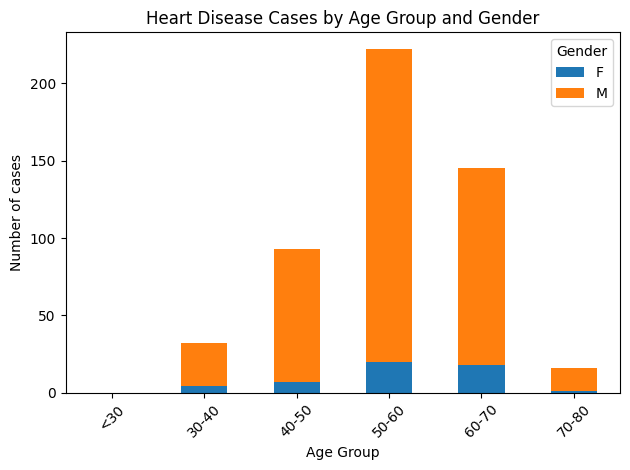

In [ ]:
heart_diseases_counts.plot(kind='bar',stacked=True)
plt.title('Heart Disease Cases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()